<a href="https://colab.research.google.com/github/abhi1994-tim/NLP_Projects/blob/main/FLipItNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('flipitnews-data.csv')
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
df.shape

(2225, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2225 non-null   object
 1   Article   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [6]:
print('Shape of Dataset - ',df.shape, "\n")
print('Total No. of News Articles - ',df['Category'].nunique(),':',df['Category'].unique(), "\n")
print('News Article per category - \n',df['Category'].value_counts(), "\n")
print('Shape of Dataset - ',df.shape)

Shape of Dataset -  (2225, 2) 

Total No. of News Articles -  5 : ['Technology' 'Business' 'Sports' 'Entertainment' 'Politics'] 

News Article per category - 
 Category
Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: count, dtype: int64 

Shape of Dataset -  (2225, 2)


In [7]:
# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Our dataset has two attributes:
* **Article:** The content of news articles
* **Category:** The category that each article belongs to, which is also the target variable

There are 2225 articles in the dataset

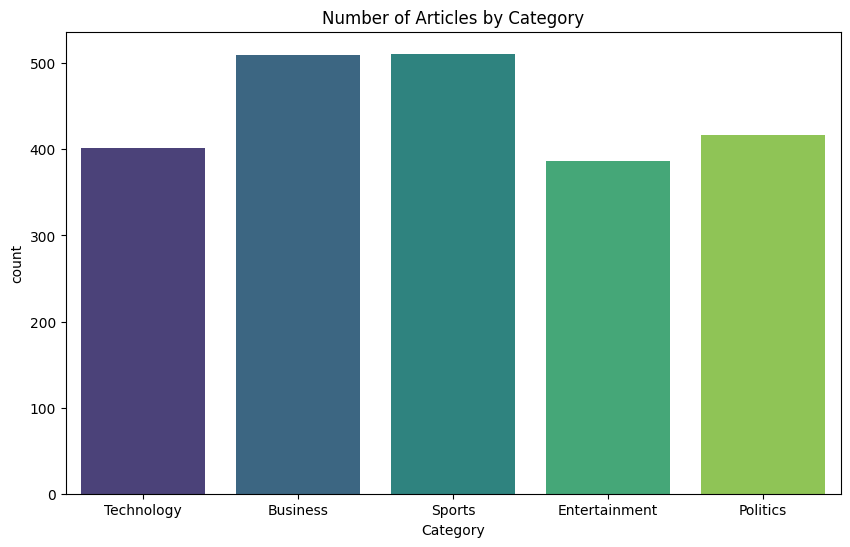

In [8]:
# The Distribution of articles by category below

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', palette='viridis')
plt.title('Number of Articles by Category')
plt.show()

In [9]:
#Lets check one of the Article to see, what exactly is preent in the Article

In [10]:
df['Article'][9]

'last star wars  not for children  the sixth and final star wars movie may not be suitable for young children  film-maker george lucas has said.  he told us tv show 60 minutes that revenge of the sith would be the darkest and most violent of the series.  i don t think i would take a five or six-year-old to this   he told the cbs programme  to be aired on sunday. lucas predicted the film would get a us rating advising parents some scenes may be unsuitable for under-13s. it opens in the uk and us on 19 may. he said he expected the film would be classified pg-13 - roughly equivalent to a british 12a rating.  the five previous star wars films have all carried less restrictive pg - parental guidance - ratings in the us. in the uk  they have all been passed u - suitable for all - with the exception of attack of the clones  which got a pg rating in 2002. revenge of the sith - the third prequel to the original 1977 star wars film - chronicles the transformation of the heroic anakin skywalker i

In [11]:
df['Category'][9]

'Entertainment'

In [12]:
# From the above random selection of the Article we saw one of the Article which is totally belong to the some of the Movie character which
# belongs to the Entertainment side , After the checking the category we saw the category is Entertainment.

In [13]:
# As per we saw the Above article we can see there is a lot of double space is there and while writing the Article a lot of punchuation is being
# used in the Article so, lets remove the above extra words and punchuation for the better analysis for text preprocessing

#Text Preprocessing

In [14]:
# Removing the String Punchtuation

In [15]:
#importing the Library for removing the punchuation
import string

def remove_punctuation(text):
  cleantext = ''.join([i for i in text if i not in string.punctuation])
  return cleantext

df['Article'] = df['Article'].apply(lambda x:remove_punctuation(x))

In [16]:
df['Article'][9]

'last star wars  not for children  the sixth and final star wars movie may not be suitable for young children  filmmaker george lucas has said  he told us tv show 60 minutes that revenge of the sith would be the darkest and most violent of the series  i don t think i would take a five or sixyearold to this   he told the cbs programme  to be aired on sunday lucas predicted the film would get a us rating advising parents some scenes may be unsuitable for under13s it opens in the uk and us on 19 may he said he expected the film would be classified pg13  roughly equivalent to a british 12a rating  the five previous star wars films have all carried less restrictive pg  parental guidance  ratings in the us in the uk  they have all been passed u  suitable for all  with the exception of attack of the clones  which got a pg rating in 2002 revenge of the sith  the third prequel to the original 1977 star wars film  chronicles the transformation of the heroic anakin skywalker into the evil darth v

In [17]:
# Removing the text StopWords

In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def stop_words(text):
  cleantext = ' '.join([i for i in text.split() if i not in stopwords.words('english')])
  return cleantext

df['Article'] = df['Article'].apply(lambda x:stop_words(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
df['Article'][9]

'last star wars children sixth final star wars movie may suitable young children filmmaker george lucas said told us tv show 60 minutes revenge sith would darkest violent series think would take five sixyearold told cbs programme aired sunday lucas predicted film would get us rating advising parents scenes may unsuitable under13s opens uk us 19 may said expected film would classified pg13 roughly equivalent british 12a rating five previous star wars films carried less restrictive pg parental guidance ratings us uk passed u suitable exception attack clones got pg rating 2002 revenge sith third prequel original 1977 star wars film chronicles transformation heroic anakin skywalker evil darth vader travels helllike planet composed erupting volcanoes molten lava going watch make pact devil lucas said film much dark emotional much tragedy'

In [20]:
# After using the stop words we can see that, there is no simple words like "is - on - the - an -a" like words are there in the Article.

In [21]:
# Let's lower all the Words to make the better analysis and the prediction

In [22]:
df['Article'] = df['Article'].str.lower()

In [23]:
df['Article'][9]

'last star wars children sixth final star wars movie may suitable young children filmmaker george lucas said told us tv show 60 minutes revenge sith would darkest violent series think would take five sixyearold told cbs programme aired sunday lucas predicted film would get us rating advising parents scenes may unsuitable under13s opens uk us 19 may said expected film would classified pg13 roughly equivalent british 12a rating five previous star wars films carried less restrictive pg parental guidance ratings us uk passed u suitable exception attack clones got pg rating 2002 revenge sith third prequel original 1977 star wars film chronicles transformation heroic anakin skywalker evil darth vader travels helllike planet composed erupting volcanoes molten lava going watch make pact devil lucas said film much dark emotional much tragedy'

As we Saw here some of the words are here which talks about the past tense or the future tense comes into the words, so lets make some changes in the words and form a proper word that can be done for the better analysis as, one words can interpretate many words.

##Using the both of the Technique Stemmer and Lemme

In [24]:
from nltk.stem import PorterStemmer

Porter = PorterStemmer()

def stem(text):
  cleantext = ' '.join([Porter.stem(i) for i in text.split()])
  return cleantext

df['Article'] = df['Article'].apply(lambda x:stem(x))

In [25]:
df['Article'][9]

'last star war children sixth final star war movi may suitabl young children filmmak georg luca said told us tv show 60 minut reveng sith would darkest violent seri think would take five sixyearold told cb programm air sunday luca predict film would get us rate advis parent scene may unsuit under13 open uk us 19 may said expect film would classifi pg13 roughli equival british 12a rate five previou star war film carri less restrict pg parent guidanc rate us uk pass u suitabl except attack clone got pg rate 2002 reveng sith third prequel origin 1977 star war film chronicl transform heroic anakin skywalk evil darth vader travel helllik planet compos erupt volcano molten lava go watch make pact devil luca said film much dark emot much tragedi'

We can see here the mots of the values in the words are not giving the best words , so it can be difficult to us to perform the analysis using those words beacuse these words are cumbersome and does not give any response from the words.


So, Lets use the Lemmertizer for the better anakysis word Making

In [26]:
from nltk.stem import WordNetLemmatizer

wordlemme =WordNetLemmatizer()
nltk.download('wordnet')

def lemme(text):
  cleantext = ' '.join([wordlemme.lemmatize(i) for i in text.split()])
  return cleantext

df['Article'] = df['Article'].apply(lambda x:lemme(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [27]:
df['Article'][9]

'last star war child sixth final star war movi may suitabl young child filmmak georg luca said told u tv show 60 minut reveng sith would darkest violent seri think would take five sixyearold told cb programm air sunday luca predict film would get u rate advis parent scene may unsuit under13 open uk u 19 may said expect film would classifi pg13 roughli equival british 12a rate five previou star war film carri le restrict pg parent guidanc rate u uk pas u suitabl except attack clone got pg rate 2002 reveng sith third prequel origin 1977 star war film chronicl transform heroic anakin skywalk evil darth vader travel helllik planet compos erupt volcano molten lava go watch make pact devil luca said film much dark emot much tragedi'

In [28]:
df['Article'][:5]

,Article
0,tv futur hand viewer home theatr system plasma...
1,worldcom bos left book alon former worldcom bo...
2,tiger wari farrel gambl leicest say rush make ...
3,yead face newcastl fa cup premiership side new...
4,ocean twelv raid box offic ocean twelv crime c...


After using the Lemme, some of the Analysis is good, and majority if the words are giving the good results for the Analyis and it makes the right impact on the words which can make Right sense

In [29]:
# Tokenization

In [30]:
import nltk
from nltk.tokenize import word_tokenize ,sent_tokenize
nltk.download('punkt')

word_cnt,unique_word_cnt=0,0

#Corpus of the entire Document
corpus=df['Article'].str.cat(sep=', ')
#print('corpus:',corpus)
print('Number of words in the entire corpus:',len(corpus))
#Find the letters used in Corpus
Unique_char=set(df['Article'].str.cat(sep=', '))
#print('Unique letters used in corpus:',Unique_char)

Vocabulary = df['Article'].str.cat(sep=', ')
#print(set(word_tokenize(Vocabulary[:20])))
for i in set(word_tokenize(Vocabulary)):
  unique_word_cnt+=1
print('Number of words in the vocabulary:',unique_word_cnt)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Number of words in the entire corpus: 3091959
Number of words in the vocabulary: 24093


In [31]:
from nltk.tokenize import word_tokenize

def tokenize(text):
  cleantext = word_tokenize(text)
  return cleantext

df['Article'] = df['Article'].apply(lambda x:tokenize(x))
df['Article']

,Article
0,"[tv, futur, hand, viewer, home, theatr, system..."
1,"[worldcom, bos, left, book, alon, former, worl..."
2,"[tiger, wari, farrel, gambl, leicest, say, rus..."
3,"[yead, face, newcastl, fa, cup, premiership, s..."
4,"[ocean, twelv, raid, box, offic, ocean, twelv,..."
...,...
2220,"[car, pull, u, retail, figur, u, retail, sale,..."
2221,"[kilroy, unveil, immigr, polici, exchatshow, h..."
2222,"[rem, announc, new, glasgow, concert, u, band,..."
2223,"[polit, squabbl, snowbal, becom, commonplac, a..."


##Encoding and Transforming the data
● Encoding the target variable
● Bag of Words
● TF-IDF
● Train-Test Split

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

print(df.head())

   Category                                            Article
0         4  [tv, futur, hand, viewer, home, theatr, system...
1         0  [worldcom, bos, left, book, alon, former, worl...
2         3  [tiger, wari, farrel, gambl, leicest, say, rus...
3         3  [yead, face, newcastl, fa, cup, premiership, s...
4         1  [ocean, twelv, raid, box, offic, ocean, twelv,...


It’s generally best to split the data into train and test sets before applying Bag of Words (BoW) or TF-IDF transformations.

**Avoiding Data Leakage:** By splitting first, we can prevent information from the test set from influencing the train set’s vocabulary or weighting in TF-IDF. If you apply BoW or TF-IDF before splitting, then the test data indirectly informs the transformation, introducing data leakage.

**Consistent Feature Space**: After the split, we can fit the BoW or TF-IDF only on the training set and then transform both the training and test sets with that fitted vectorizer. This ensures that the test set only uses vocabulary and term weights based on the training data, keeping it a truly unseen dataset.

#Using BOW (Bag Of Words)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# Ensure each article is a single string
df['Article'] = df['Article'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

cv = CountVectorizer()
bow = cv.fit_transform(df['Article'])

print("\nVocabulary:")
vocab_items = list(cv.vocabulary_.items())[:10]
for word, index in vocab_items:
    print(f"{word}: {index}")


Vocabulary:
tv: 21894
futur: 9568
hand: 10447
viewer: 22699
home: 11003
theatr: 21244
system: 20913
plasma: 16726
highdefinit: 10834
digit: 7259


In [34]:
# Display the BOW matrix and vocabulary
print("Bag of Words Matrix:",bow.toarray().shape)
print(bow.toarray())

Bag of Words Matrix: (2225, 23730)
[[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [35]:
print('Frequency of words',bow.toarray().sum(axis=0))
print('words in vocabulary',cv.get_feature_names_out())

Frequency of words [  7 794   1 ...   1   4   2]
words in vocabulary ['00' '000' '0001' ... 'zuton' 'zvonareva' 'zvyagintsev']


#TFIDF - Term Frequency/Inverse Document Frequency

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer()
TFIDF = tfidf.fit_transform(df['Article'])


print("\nVocabulary:")
vocab_items = list(tfidf.vocabulary_.items())[:10]
for word, index in vocab_items:
    print(f"{word}: {index}")


Vocabulary:
tv: 21894
futur: 9568
hand: 10447
viewer: 22699
home: 11003
theatr: 21244
system: 20913
plasma: 16726
highdefinit: 10834
digit: 7259


In [37]:
print(tfidf.vocabulary_)

{'tv': 21894, 'futur': 9568, 'hand': 10447, 'viewer': 22699, 'home': 11003, 'theatr': 21244, 'system': 20913, 'plasma': 16726, 'highdefinit': 10834, 'digit': 7259, 'video': 22686, 'record': 17786, 'move': 14746, 'live': 13217, 'room': 18432, 'way': 22969, 'peopl': 16440, 'watch': 22944, 'radic': 17527, 'differ': 7250, 'five': 9058, 'year': 23574, 'time': 21428, 'accord': 2417, 'expert': 8556, 'panel': 16155, 'gather': 9696, 'annual': 3061, 'consum': 6223, 'electron': 8025, 'show': 19456, 'la': 12712, 'vega': 22579, 'discus': 7369, 'new': 15151, 'technolog': 21090, 'impact': 11416, 'one': 15692, 'favourit': 8798, 'pastim': 16287, 'lead': 12901, 'trend': 21728, 'programm': 17228, 'content': 6240, 'deliv': 7024, 'via': 22648, 'network': 15130, 'cabl': 5021, 'satellit': 18759, 'telecom': 21116, 'compani': 6049, 'broadband': 4754, 'servic': 19196, 'provid': 17296, 'front': 9477, 'portabl': 16894, 'devic': 7186, 'talkedabout': 20964, 'ce': 5362, 'person': 16497, 'dvr': 7810, 'pvr': 17401, 's

In [38]:
# Display the BOW matrix and vocabulary
print("TFIDF Matrix:",TFIDF.toarray().shape)
print(TFIDF.toarray())


TFIDF Matrix: (2225, 23730)
[[0.         0.01981838 0.         ... 0.         0.         0.        ]
 [0.         0.024812   0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02638331 0.         ... 0.         0.         0.        ]
 [0.         0.01687312 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


From the Above we have checked the BOw and TFIDF for all the data, Let's Split the model and use the BOW and TFIDF for the later Evaluation and training model for the Anlaysis

#Model Training & Evaluation

In [39]:
X = df[['Article']]
y = df['Category']

In [40]:
# Performing Train and split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1780, 1)
y_train shape: (1780,)
X_test shape: (445, 1)
y_test shape: (445,)


In [41]:
# Using BOW (Bag Of Words) Vectorization

In [42]:
# Bag of Words Vectorization
articles_train = X_train['Article'].apply(lambda x: ''.join(x)).tolist()
articles_test = X_test['Article'].apply(lambda x: ''.join(x)).tolist()

In [43]:
vectorizer = CountVectorizer()
bow_matrix_a = vectorizer.fit_transform(articles_train) #changing the words into BOW for train data
bow_matrix_b = vectorizer.transform(articles_test) #changing the words into BOW for test data


bow_train = pd.DataFrame(bow_matrix_a.toarray(), columns=vectorizer.get_feature_names_out())
bow_test = pd.DataFrame(bow_matrix_b.toarray(), columns=vectorizer.get_feature_names_out())

bow_train.head(10)

,00,000,0001,000300,00051,000acr,000bn,000m,000seat,000strong,...,zonealarm,zoom,zooropa,zornotza,zorro,zubair,zurich,zuton,zvonareva,zvyagintsev
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
print(bow_train.shape)
print(bow_test.shape)

(1780, 21201)
(445, 21201)


In [45]:
# TF_IDF Vectorization for train test split for model Analysis

In [46]:
#TF-IDF vectorization
tf_idf = TfidfVectorizer()

tfidf_a = tf_idf.fit_transform(articles_train).todense()
tfidf_b = tf_idf.transform(articles_test).todense()

tf_train = pd.DataFrame(tfidf_a, columns=tf_idf.get_feature_names_out())
tf_test = pd.DataFrame(tfidf_b, columns=tf_idf.get_feature_names_out())

tf_train.head(10)

,00,000,0001,000300,00051,000acr,000bn,000m,000seat,000strong,...,zonealarm,zoom,zooropa,zornotza,zorro,zubair,zurich,zuton,zvonareva,zvyagintsev
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.071279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
print(tf_train.shape)
print(tf_test.shape)

(1780, 21201)
(445, 21201)


#Naives Bayes Approach Model

In [48]:
# prompt: import naives bayes classifier

from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier using the BoW training data
nb_classifier.fit(bow_train, y_train)

# Make predictions on the BoW test data
y_pred_nb_bow = nb_classifier.predict(bow_test)

# Evaluate the classifier's performance using metrics like accuracy, precision, recall, and F1-score
from sklearn.metrics import accuracy_score, classification_report

print("Naive Bayes with BoW:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb_bow)}", "\n")

print(classification_report(y_test, y_pred_nb_bow))

Naive Bayes with BoW:
Accuracy: 0.9617977528089887 

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       101
           1       1.00      0.90      0.95        81
           2       0.92      0.99      0.95        83
           3       0.99      1.00      0.99        98
           4       0.92      0.99      0.95        82

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445



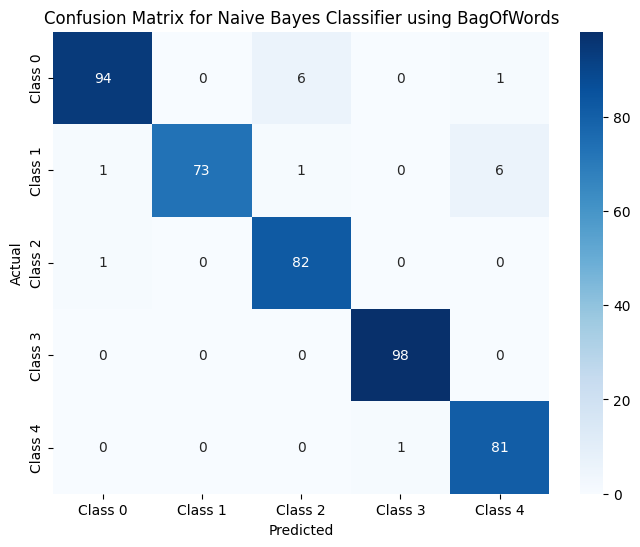

In [49]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb_bow)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'],
            yticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Classifier using BagOfWords')
plt.show()

In [50]:
# Train the classifier using the TF-IDF training data
nb_classifier.fit(tf_train, y_train)

# Make predictions on the TF-IDF test data
y_pred_nb_tfidf = nb_classifier.predict(tf_test)


print("Naive Bayes with TF-IDF:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb_tfidf)}", "\n")
print(classification_report(y_test, y_pred_nb_tfidf))

Naive Bayes with TF-IDF:
Accuracy: 0.9617977528089887 

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       101
           1       1.00      0.88      0.93        81
           2       0.91      0.99      0.95        83
           3       0.99      1.00      0.99        98
           4       0.95      0.99      0.97        82

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445



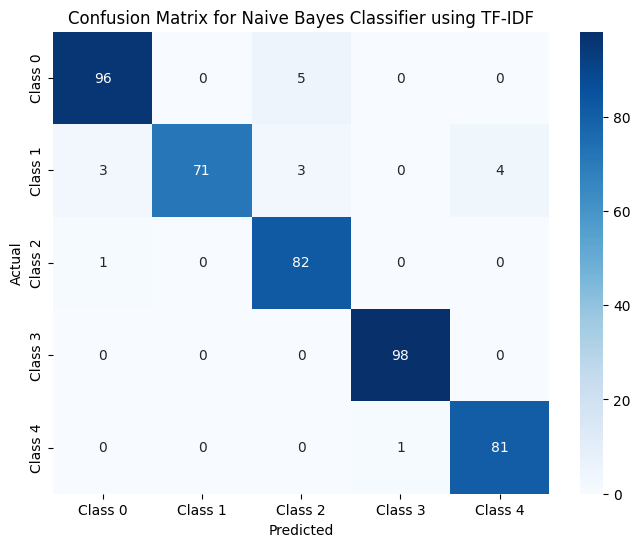

In [51]:
# Calculate the confusion matrix
conf_matrix_tf = confusion_matrix(y_test, y_pred_nb_tfidf)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'],
            yticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Classifier using TF-IDF')
plt.show()

We can observe that both BOW and TF-IDF approaches have a similar result. The Confusion matrix shows that both methods have very few missclassifications with an accuracy and average F1 score of 96%

In [52]:
# Creating a DataFrame with actual and predicted values
df_results_bow = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_nb_bow
})
df_results_bow.head(10)

,Actual,Predicted
0,2,2
1,0,0
2,1,1
3,4,4
4,3,3
5,0,0
6,0,4
7,3,3
8,3,3
9,4,4


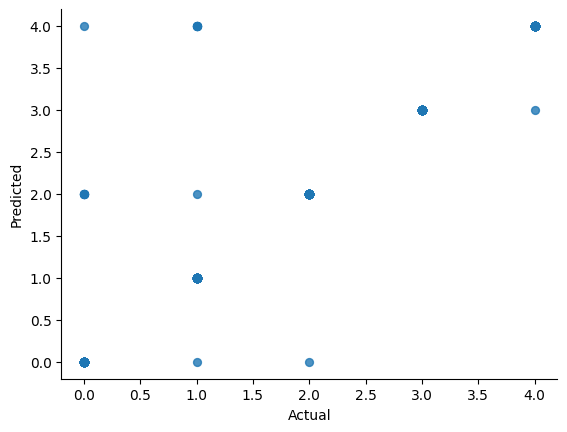

In [53]:
from matplotlib import pyplot as plt
df_results_bow.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#Decision Tree Model Classifier

Decision Tree with BoW:
Accuracy: 0.8561797752808988 

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       101
           1       0.89      0.81      0.85        81
           2       0.81      0.89      0.85        83
           3       0.90      0.88      0.89        98
           4       0.88      0.87      0.87        82

    accuracy                           0.86       445
   macro avg       0.86      0.86      0.86       445
weighted avg       0.86      0.86      0.86       445



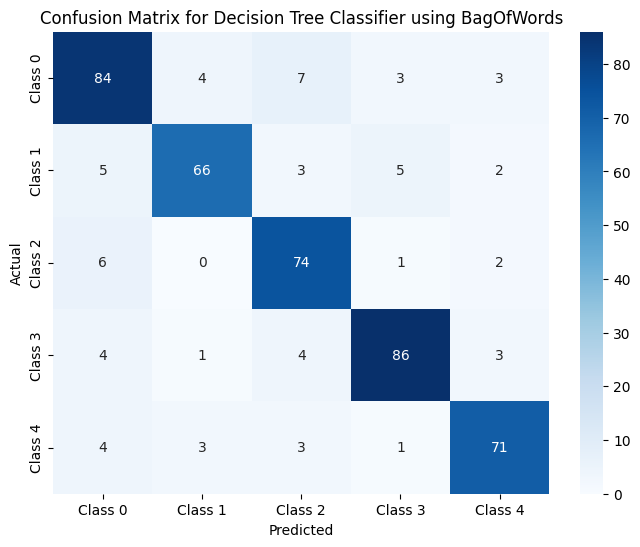

In [54]:


from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier using the BoW training data
dt_classifier.fit(bow_train, y_train)

# Make predictions on the BoW test data
y_pred_dt_bow = dt_classifier.predict(bow_test)

# Evaluate the classifier's performance using metrics like accuracy, precision, recall, and F1-score
print("Decision Tree with BoW:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt_bow)}", "\n")
print(classification_report(y_test, y_pred_dt_bow))

# Calculate the confusion matrix
conf_matrix_dt_bow = confusion_matrix(y_test, y_pred_dt_bow)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt_bow, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'],
            yticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier using BagOfWords')
plt.show()

Decision Tree with TF-IDF:
Accuracy: 0.8134831460674158 

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       101
           1       0.81      0.70      0.75        81
           2       0.76      0.84      0.80        83
           3       0.92      0.89      0.90        98
           4       0.80      0.87      0.83        82

    accuracy                           0.81       445
   macro avg       0.81      0.81      0.81       445
weighted avg       0.82      0.81      0.81       445



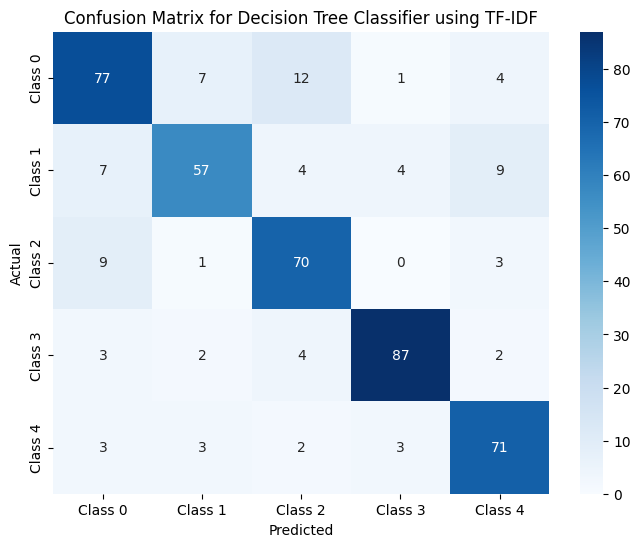

In [55]:
# Train the classifier using the TF-IDF training data
dt_classifier.fit(tf_train, y_train)

# Make predictions on the TF-IDF test data
y_pred_dt_tfidf = dt_classifier.predict(tf_test)

print("Decision Tree with TF-IDF:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt_tfidf)}", "\n")
print(classification_report(y_test, y_pred_dt_tfidf))


# Calculate the confusion matrix
conf_matrix_dt_tfidf = confusion_matrix(y_test, y_pred_dt_tfidf)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt_tfidf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'],
            yticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier using TF-IDF')
plt.show()

In [56]:
# from the model Analysis with the Decision Tree classifier we can see that the, Accuracy comes out to be the 86%  for the BOW and
# the Accuracy comes out to be the 83% for the TF-IDF, here we can say the most classification for the TFIDF could be the strong as per the BOW
# as we know the Intensity for the TF-IDF is large as compare to the BOW

#K Nearest Neighbors

In [57]:
from sklearn.neighbors import NearestNeighbors

# Assuming 'tf_train' is your TF-IDF matrix for training data
# You can replace it with 'bow_train' if you want to use BoW features

# Initialize the Nearest Neighbors model
knn = NearestNeighbors(n_neighbors=5, metric='cosine')

# Fit the model to your TF-IDF data
knn.fit(tf_train)


# Example: Find the nearest neighbors for a specific article in your test set
article_index_to_find_neighbors_for = 0  # Replace with the index of the article in tf_test
distances, indices = knn.kneighbors(tf_test.iloc[[article_index_to_find_neighbors_for]])


# Print the indices of the nearest neighbors
print("Nearest Neighbors' indices:", indices)


# Print the distances to the nearest neighbors
print("Distances to Nearest Neighbors:", distances)


# To get the actual articles corresponding to these indices, you can use the original dataframe 'df'


Nearest Neighbors' indices: [[ 853 1361  137 1645  706]]
Distances to Nearest Neighbors: [[0.55971733 0.57797058 0.58351216 0.60894163 0.62955047]]


In [58]:
df['Article'].iloc[[ 853, 1361,  137, 1645,  706]]

,Article
853,uk economi end year spurt uk economi grew esti...
1361,execut trio leav aer lingu three senior execut...
137,2d metal slug offer retro fun like drill serge...
1645,verdict delay greek sprinter greek athlet gove...
706,ireland 2119 argentina injurytim drop goal ron...


In [59]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier using the TF-IDF training data
knn_classifier.fit(tf_train, y_train)

# Make predictions on the TF-IDF test data
y_pred_knn_tfidf = knn_classifier.predict(tf_test)

# Evaluate the classifier's performance
print("K-Nearest Neighbors with TF-IDF:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn_tfidf)}")
print(classification_report(y_test, y_pred_knn_tfidf))

K-Nearest Neighbors with TF-IDF:
Accuracy: 0.9393258426966292
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       101
           1       0.96      0.96      0.96        81
           2       0.86      0.92      0.89        83
           3       0.98      1.00      0.99        98
           4       0.94      0.98      0.96        82

    accuracy                           0.94       445
   macro avg       0.94      0.94      0.94       445
weighted avg       0.94      0.94      0.94       445



In [60]:
# Creating a DataFrame with actual and predicted values
df_results_knn = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_knn_tfidf
})
df_results_knn.head(10)

,Actual,Predicted
0,2,2
1,0,0
2,1,1
3,4,4
4,3,3
5,0,0
6,0,2
7,3,3
8,3,3
9,4,4


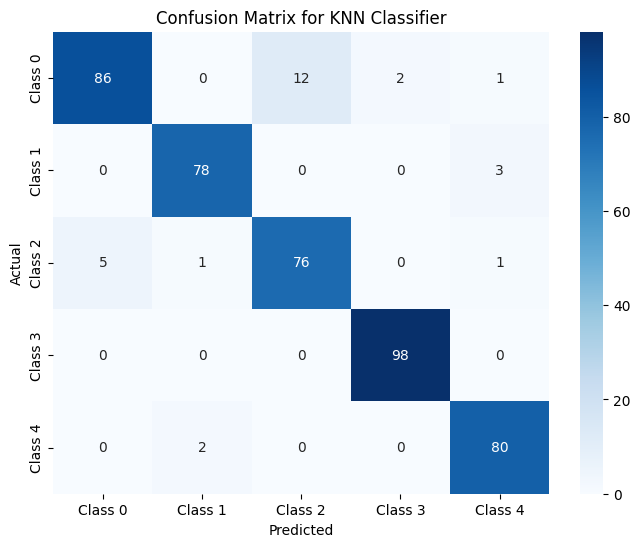

In [61]:
# Calculate the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn_tfidf)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'],
            yticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

In [62]:
# The KNN classifier shows good results (93% accuracy) with TF-IDF vectorization because it takes into consideration the uniqueness of the words
# with respect to the articles, which shows the best accuracy till now comparing all the models and their accuracy

In [63]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier using the BOW training data
knn_classifier.fit(bow_train, y_train)

# Make predictions on the BOW test data
y_pred_knn_bow = knn_classifier.predict(bow_test)

# Evaluate the classifier's performance
print("K-Nearest Neighbors with BOW:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn_bow)}")
print(classification_report(y_test, y_pred_knn_bow))

K-Nearest Neighbors with BOW:
Accuracy: 0.6808988764044944
              precision    recall  f1-score   support

           0       0.88      0.63      0.74       101
           1       0.88      0.56      0.68        81
           2       0.85      0.81      0.83        83
           3       0.46      1.00      0.63        98
           4       1.00      0.35      0.52        82

    accuracy                           0.68       445
   macro avg       0.81      0.67      0.68       445
weighted avg       0.80      0.68      0.68       445



In [64]:
# Here we can see from the same model with the KNN by using the Bag of words (BOW) is giving the bad results as comapre to the TF-IDF which is giving
# the Good results from the BOw. while the TF-IDF consists the more consistency in the words and gives more importamce to the words which are
# similar to each other

#Random Forest Classifier Model

In [65]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest with BoW
rf_classifier_bow = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_bow.fit(bow_train, y_train)
y_pred_rf_bow = rf_classifier_bow.predict(bow_test)

print("Random Forest with BoW:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_bow)}")
print(classification_report(y_test, y_pred_rf_bow))

Random Forest with BoW:
Accuracy: 0.950561797752809
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       101
           1       0.99      0.93      0.96        81
           2       0.94      0.95      0.95        83
           3       0.97      0.99      0.98        98
           4       0.97      0.93      0.95        82

    accuracy                           0.95       445
   macro avg       0.95      0.95      0.95       445
weighted avg       0.95      0.95      0.95       445



In [66]:
# Random Forest also gives the good model for the Analysis making, and but intrestingly we are getting the 95% Accuracy, with the BOW and also,
# from the IF-IDF we get the 93% accuracy, so from this Model, the BOW gives the best result, from this model BOW as compare to TF-IDF

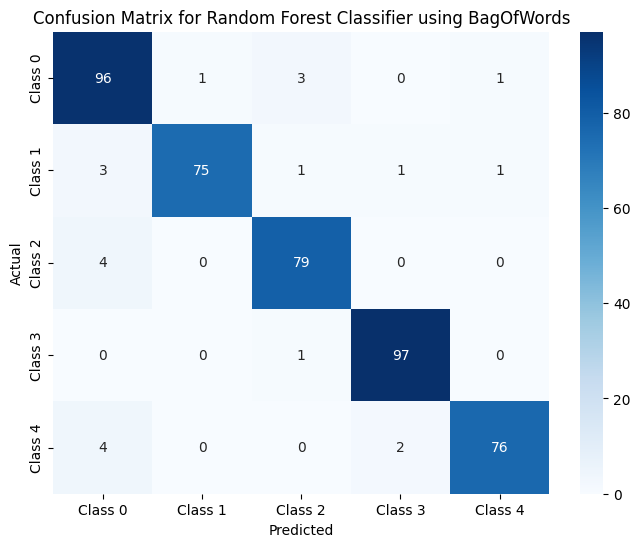

In [67]:
# Calculate the confusion matrix for Random Forest with BoW
conf_matrix_rf_bow = confusion_matrix(y_test, y_pred_rf_bow)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_bow, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'],
            yticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier using BagOfWords')
plt.show()

In [68]:
# Random Forest with TF-IDF
rf_classifier_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_tfidf.fit(tf_train, y_train)
y_pred_rf_tfidf = rf_classifier_tfidf.predict(tf_test)

print("Random Forest with TF-IDF:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_tfidf)}")
print(classification_report(y_test, y_pred_rf_tfidf))

Random Forest with TF-IDF:
Accuracy: 0.9325842696629213
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       101
           1       0.99      0.89      0.94        81
           2       0.92      0.94      0.93        83
           3       0.94      0.99      0.97        98
           4       0.95      0.91      0.93        82

    accuracy                           0.93       445
   macro avg       0.94      0.93      0.93       445
weighted avg       0.93      0.93      0.93       445



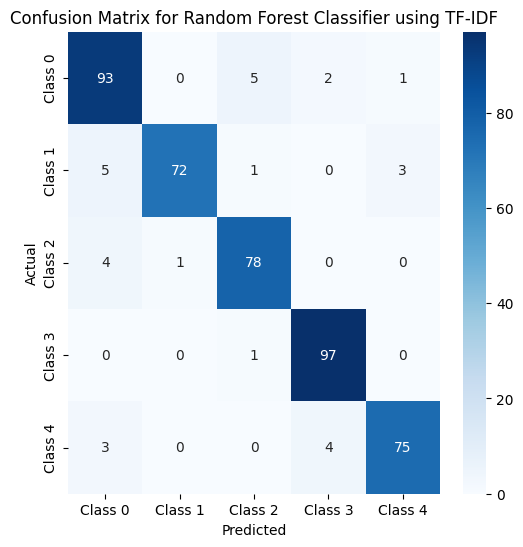

In [69]:
# Calculate the confusion matrix for Random Forest with TF-IDF
conf_matrix_rf_tfidf = confusion_matrix(y_test, y_pred_rf_tfidf)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_rf_tfidf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'],
            yticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier using TF-IDF')
plt.show()

#Questionnaire

###1. How many news articles are present in the dataset that we have?

In [70]:
df['Article'].shape

(2225,)

##2. Most of the news articles are from _____ category.

In [71]:
#Most of the News Article is from the Sports with the (511) and Business With the (510)

##3. Only ___ no. of articles belong to the ‘Technology’ category.

In [72]:
# Only 401 articles belong to the technology class

##4. What are Stop Words and why should they be removed from the text data?

In [73]:
# "In text analysis projects, certain commonly occurring words, known as stop words—such as pronouns, articles, conjunctions, and prepositions
#  (e.g., 'I', 'you', 'and', 'because')—do not contribute significant meaning or analytical value to the document.
# These words tend to appear with high frequency across various texts but do not provide insights specific to the content's context or topics.
# Therefore, removing these stop words during preprocessing is essential to focus the analysis on words that carry more informational weight,
# ultimately improving the accuracy and relevance of text-based insights."

##5. Explain the difference between Stemming and lematization.

In [74]:
# "Stemming and lemmatization are text preprocessing techniques used to reduce words to their root forms, but they differ in approach and accuracy.
# Stemming is a simpler method that cuts off word endings to produce root forms by removing prefixes and suffixes without regard for actual
# dictionary forms, which can sometimes result in non-existent or incomplete words.
# In contrast, lemmatization uses a more sophisticated approach by converting words to their actual root or dictionary form based on context and
# vocabulary, making it generally more accurate and preferable for projects where meaningful text analysis is critical.
# For example, lemmatization would convert 'running' to 'run' based on grammatical analysis, while stemming might reduce it to 'runn,'
# which is less recognizable."

##6. Which of the techniques Bag of Words or TF-IDF is considered to be more efficient than the other?

In [ ]:
# The TF-IDF (Term Frequency-Inverse Document Frequency) technique provides a more sophisticated approach to text analysis by capturing both the
# importance of a term within a single document and its relevance across a broader set of documents.
# Specifically, TF-IDF calculates the normalized frequency of a term within a document, indicating how often the term appears relative to the
# document's length. Additionally, it assesses the term's significance by considering how many documents in the entire corpus contain that term.
# This dual approach helps highlight terms that are distinctive to a particular document while downplaying common terms that appear frequently
# across multiple documents, allowing for a more accurate and insightful analysis of textual content.

##7. What’s the shape of train & test data sets after performing a 75:25 split?

In [75]:
#The shape of train data is (1668,1) and test data is (557,1) after performing a 75:25 split.

##8. Which of the following is found to be the best-performing model..
###a. Random Forest b. Nearest Neighbors c. Naive Bayes

In [76]:
# The Naive Bayes model emerged as the best-performing model, achieving an impressive accuracy of 96%.
# This high accuracy rate makes it a reliable choice for classification tasks within this project.
# Random Forest, while slightly trailing Naive Bayes in performance, also delivered strong results.
# An interesting observation in the comparison between models is the difference in performance between
# Bag of Words (BOW) and TF-IDF (Term Frequency-Inverse Document Frequency).
# Specifically, models trained on BOW representations consistently demonstrated higher accuracy than those trained on TF-IDF representations.
# This discrepancy may suggest that the BOW model, despite its simpler representation, aligns well with the data and possibly benefits
# from less feature sparsity compared to TF-IDF. However, it’s worth noting that the BOW-based Naive Bayes model may exhibit signs of
# overfitting —meaning that while it shows high accuracy on the test set, it may not generalize as well to unseen data as TF-IDF-based models.
# This could contribute to its higher accuracy score when compared to TF-IDF but also implies that further evaluation on additional data
# is recommended to confirm its robustness.

##Q9. According to this particular use case, both precision and recall are equally important. (T/F)

In [77]:
# True. Precision and Recall are both equally important. So F1 score is a better metric to look at.